In [1]:
from BST import BST
from SplayTree import SplayTree
from genTask import getTaskSeq,getRealTaskSeq,getTaskSeq_searchRecent,getTaskSeq_allRecent
import time
import matplotlib.pyplot as plt
import numpy as np

def drawPlot(input_sizes, splay_times,bst_times,seqLen,taskFreq):
    # 画点
    plt.plot(input_sizes, splay_times, marker='o', color='b', label='Splay Tree')
    plt.plot(input_sizes, bst_times, marker='x', color='r', label='BST')

    plt.xlabel('Tree Size N')
    plt.ylabel(f'{seqLen} Operations Times Cost (seconds)')
    plt.title(f'Search:Insert:Delete={taskFreq}\n Operations Time Cost vs Tree Size N')
    plt.grid(True)
    # 添加图例并将其放在右下角
    plt.legend(loc='lower right')
    plt.show()


    # 画点
    plt.plot(input_sizes, splay_times, marker='o', color='b', label='Splay Tree')
    plt.plot(input_sizes, bst_times, marker='x', color='r', label='BST')

    plt.xscale('log', base=2)  # 将x轴改成对数坐标
    plt.xlabel('Tree Size N')
    plt.ylabel(f'{seqLen} Operations Times Cost (seconds)')
    plt.title(f'Search:Insert:Delete={taskFreq}\n Operations Time Cost vs Tree Size N')
    plt.grid(True)
    # 添加图例并将其放在右下角
    plt.legend(loc='lower right')
    plt.show()

def drawPlot_general(x, y_group,y_label_group,seqLen,taskFreq,scale_x_log=False):
    # 画点
    num_colors = len(y_group)  # 根据 y_group 的长度生成颜色
    colors = plt.cm.tab10(np.linspace(0, 1, num_colors))  # 生成 num_colors 个颜色，tab10 是一种常用的配色方案  
    markers = ['o', 'x', '^', 's', 'D', 'v', '<', '>', 'p', '*']  # 预定义标记样式

    for i in range(len(y_group)):
        plt.plot(x, y_group[i], marker=markers[i % len(markers)], color=colors[i], label=y_label_group[i])
    if scale_x_log:
        plt.xscale('log', base=2)  # 将x轴改成对数坐标
    plt.xlabel('Tree Size N')
    plt.ylabel(f'{seqLen} Operations Times Cost (seconds)')
    plt.title(f'Search:Insert:Delete={taskFreq}\n Operations Time Cost vs Tree Size N')
    plt.grid(True)
    # 添加图例并将其放在右下角
    plt.legend(loc='upper left')
    plt.show()


# SplayTree与普通BST的时间复杂度实验
## 目录
- 在无时间/空间局部性的数据下，二者的时间复杂度
- 在有时间局部性的数据下
- 在有空间局部性的数据下

## 首先验证SpalyTree和普通BST的在三个操作下的 时间复杂度是否为logn
search/insert/delete = [1:1:1] in all operations
## 普通的二叉搜索树BST与 SplayTree 三种操作的时间复杂度

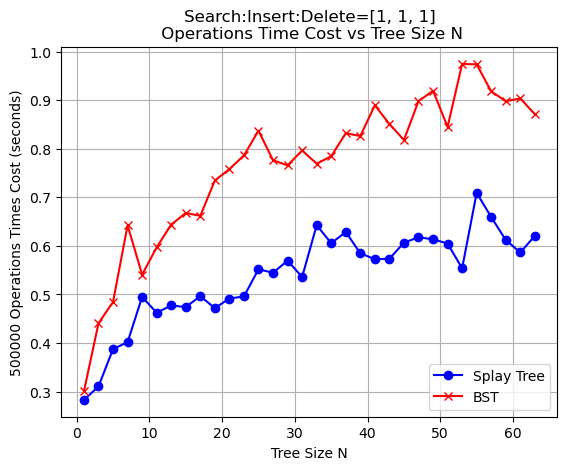

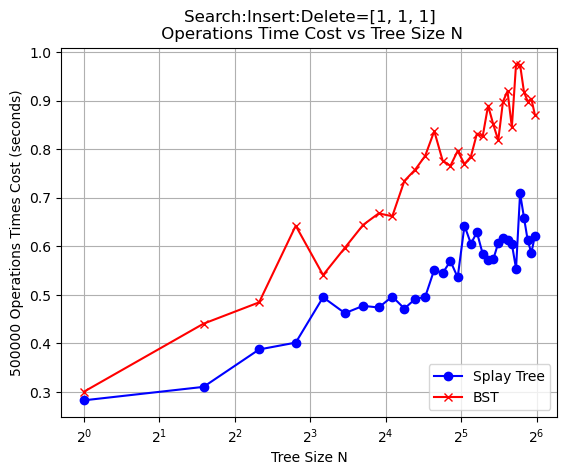

In [40]:
input_sizes = []
splay_times = []
bst_times=[]
seqLen=500000
taskFreq=[1,1,1]

for size in range(1, 2**6, 2):

    input_sizes.append(size)
    splay_time_all=[]
    bst_time_all=[]

    # 生成任务序列，其中taskFreq决定 三种任务的占比
    seq1, op1, exist = getRealTaskSeq(existsLen=size, seqLen=seqLen, taskFreq=taskFreq)
    seq0 = exist
    op0 = [1 for i in range(len(seq0))]

    sp = SplayTree()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    splay_times.append(end_time - start_time)


    sp = BST()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    bst_times.append(end_time - start_time)


drawPlot(input_sizes, splay_times,bst_times,seqLen,taskFreq)

## 对上图的结果分析  
三种操作为[1:1:1]时，普通BST和SpalyTree的时间复杂度都是logn级别的  
其中对应 x_scale为log base2时，能够看出是线性增长的  
同时能看出SpalyTree的操作总时间均比普通BST要快  
## search操作中，普通BST与SplayTree的比较

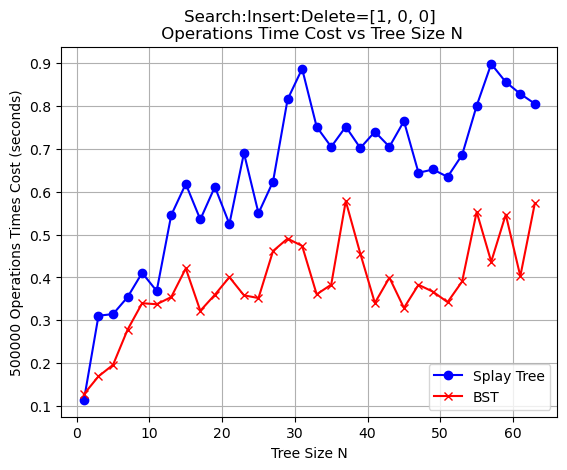

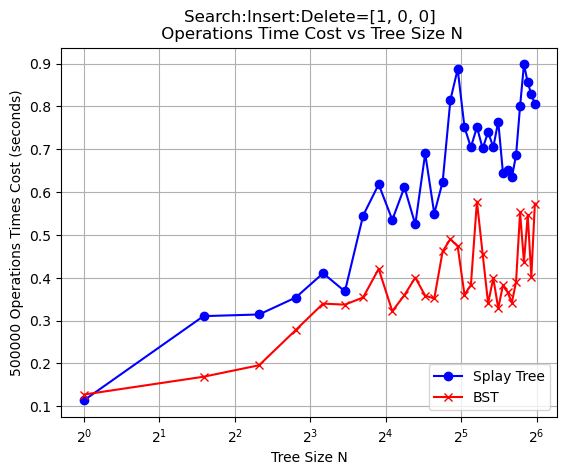

In [41]:
input_sizes = []
splay_times = []
bst_times=[]
seqLen=500000
taskFreq=[1,0,0]

for size in range(1, 2**6, 2):

    input_sizes.append(size)
    splay_time_all=[]
    bst_time_all=[]

    # 生成任务序列，其中taskFreq决定 三种任务的占比
    seq1, op1, exist = getRealTaskSeq(existsLen=size, seqLen=seqLen, taskFreq=taskFreq)
    seq0 = exist
    op0 = [1 for i in range(len(seq0))]

    sp = SplayTree()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    splay_times.append(end_time - start_time)


    sp = BST()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    bst_times.append(end_time - start_time)


drawPlot(input_sizes, splay_times,bst_times,seqLen,taskFreq)

## 对上图的结果分析
由于SplayTree每次search操作都会做额外的Splay，而当前的数据，在搜索上又不具备**时间局部性**与**空间局部性**  
故splay增大了时间花销,SplayTree的时间要多于普通BST
## Insert 操作在普通BST与SplayTree的比较

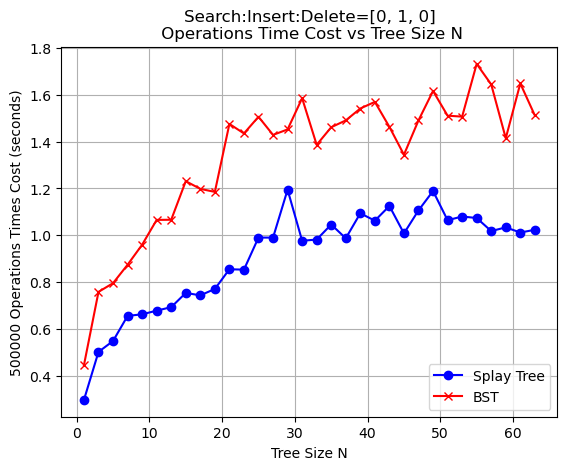

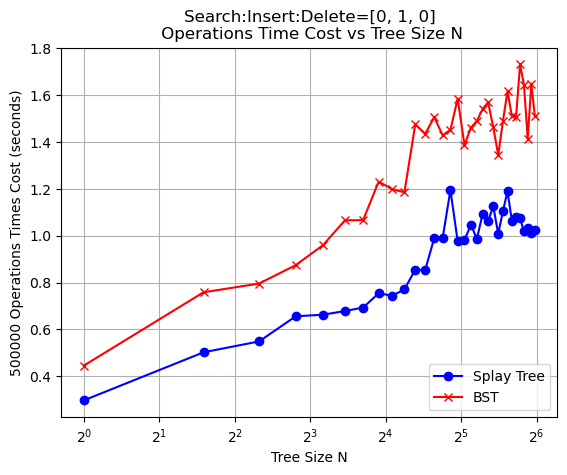

In [38]:
input_sizes = []
splay_times = []
bst_times=[]
seqLen=500000
taskFreq=[0,1,0]

for size in range(1, 2**6, 2):

    input_sizes.append(size)
    splay_time_all=[]
    bst_time_all=[]

    # 生成任务序列，其中taskFreq决定 三种任务的占比
    seq1, op1, exist = getRealTaskSeq(existsLen=size, seqLen=seqLen, taskFreq=taskFreq)
    seq0 = exist
    op0 = [1 for i in range(len(seq0))]

    sp = SplayTree()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    splay_times.append(end_time - start_time)


    sp = BST()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    bst_times.append(end_time - start_time)


drawPlot(input_sizes, splay_times,bst_times,seqLen,taskFreq)

## 对上图的结果分析
由于是Insert操作，无论是普通BST还是SpalyTree,都是要找到对应位置再插入，但是这里不知道怎么解释SpalyTree要更好  
## Delete操作在 普通BST和SplayTree中的比较

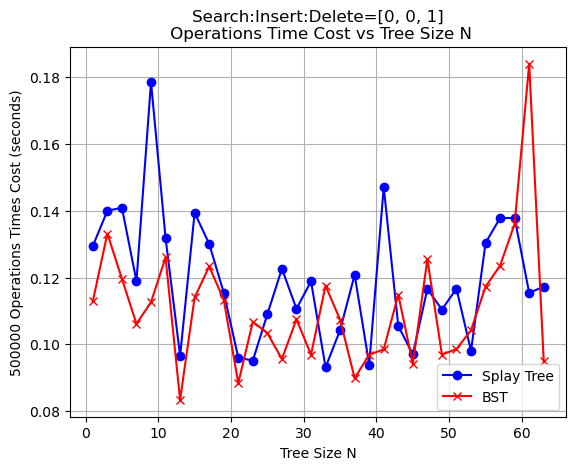

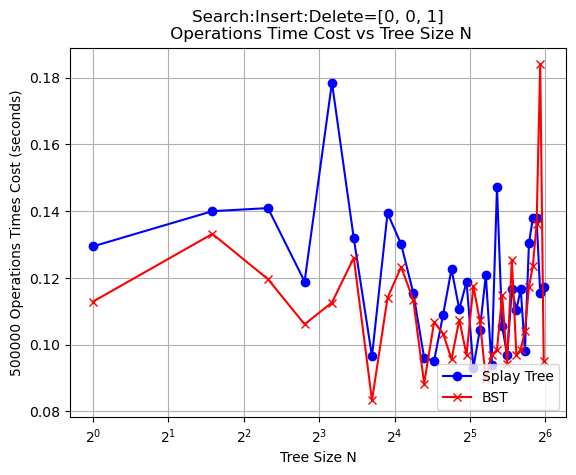

In [42]:
input_sizes = []
splay_times = []
bst_times=[]
seqLen=500000
taskFreq=[0,0,1]

for size in range(1, 2**6, 2):

    input_sizes.append(size)
    splay_time_all=[]
    bst_time_all=[]

    # 生成任务序列，其中taskFreq决定 三种任务的占比
    seq1, op1, exist = getRealTaskSeq(existsLen=size, seqLen=seqLen, taskFreq=taskFreq)
    seq0 = exist
    op0 = [1 for i in range(len(seq0))]

    sp = SplayTree()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    splay_times.append(end_time - start_time)


    sp = BST()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    bst_times.append(end_time - start_time)


drawPlot(input_sizes, splay_times,bst_times,seqLen,taskFreq)

## 对上图的结果分析
好像二者并没有什么区别  
# 将数据加入时间局部性/空间局部性后，普通BST与SpalyTree的比较
##  ---加入时间局部性后，Search的区别

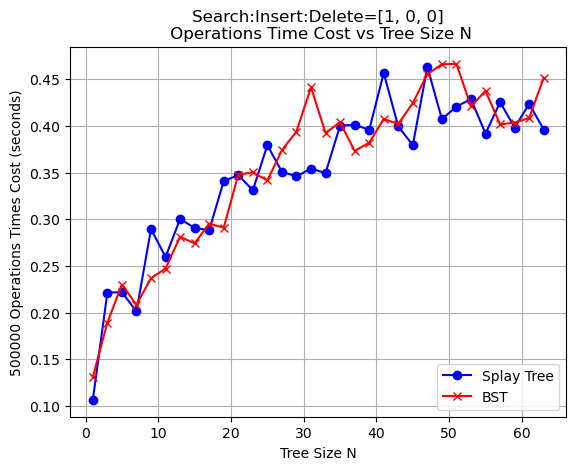

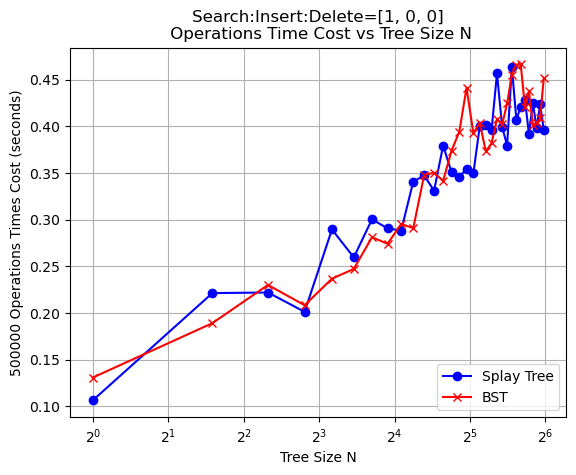

In [4]:

input_sizes = []
splay_times = []
bst_times=[]
seqLen=500000
taskFreq=[1,0,0]
recentFreq=[12,3,1]
preOp=2
for size in range(1, 2**6, 2):

    input_sizes.append(size)
    splay_time_all=[]
    bst_time_all=[]

    # 生成任务序列，其中taskFreq决定 三种任务的占比
    seq1, op1, exist = getTaskSeq_searchRecent(existsLen=size, seqLen=seqLen, taskFreq=taskFreq, recentFreq=recentFreq, preOp=preOp)
    seq0 = exist
    op0 = [1 for i in range(len(seq0))]

    sp = SplayTree()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    splay_times.append(end_time - start_time)


    sp = BST()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    bst_times.append(end_time - start_time)


drawPlot(input_sizes, splay_times,bst_times,seqLen,taskFreq)

## 对上图的结果分析
注意之前在没有时间局部性的数据中，在search操作中，普通BST的时间是要快于SpalyTree的时间的  
而这里在具有**时间局部性**的数据中，在search操作上，SplayTree的时间已经和普通BST'持平'了
### 加入时间局部性的操作  
主要是靠 :  
从先前操作数opNum中的最近preOp次中再次搜索 : 过去搜索过的(一个单独的列表保存搜索过的num) : 正常随机搜索=recentFreq=[12,3,1]
## 仅仅在search操作数据上具有时间局部性的 三种操作的均摊时间复杂度

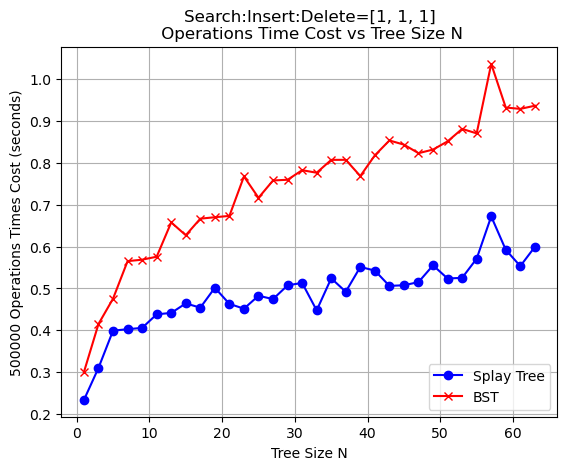

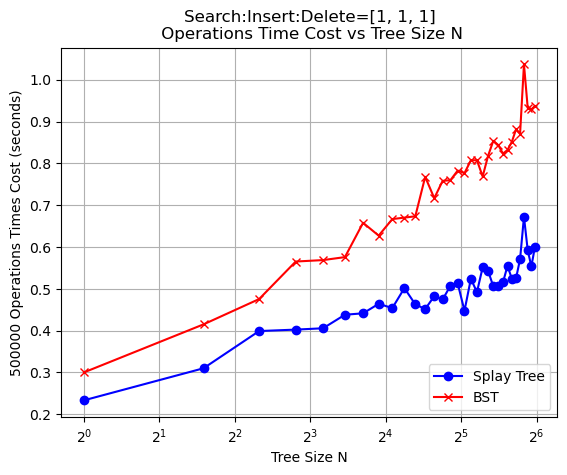

In [5]:

input_sizes = []
splay_times = []
bst_times=[]
seqLen=500000
taskFreq=[1,1,1]
recentFreq=[12,3,1]
preOp=2
for size in range(1, 2**6, 2):

    input_sizes.append(size)
    splay_time_all=[]
    bst_time_all=[]

    # 生成任务序列，其中taskFreq决定 三种任务的占比
    seq1, op1, exist = getTaskSeq_searchRecent(existsLen=size, seqLen=seqLen, taskFreq=taskFreq, recentFreq=recentFreq, preOp=preOp)
    seq0 = exist
    op0 = [1 for i in range(len(seq0))]

    sp = SplayTree()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    splay_times.append(end_time - start_time)


    sp = BST()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    bst_times.append(end_time - start_time)


drawPlot(input_sizes, splay_times,bst_times,seqLen,taskFreq)

## 对上图的结果分析
在search操作数据上有时间局部性，其实在SplayTree上对整体操作的时间复杂度的减低还是有点效果的，可以对比第一个cell中的结果  
接下来试试看在三个操作上都有时间局部性的比较

## 对每个操作都加入时间局部性
注意这里用的生成操作数据的代码变成了getTaskSeq_allRecent，而不是getTaskSeq_searchRecent  
具体操作就是 以一定概率(0.5)从之前的前preOp个操作数中选取操作数 / 正常随机选操作数

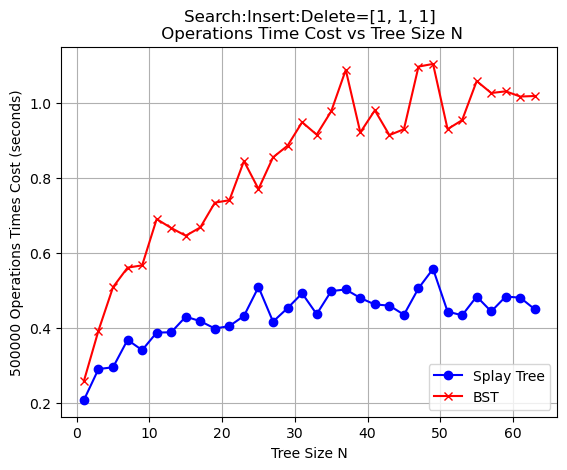

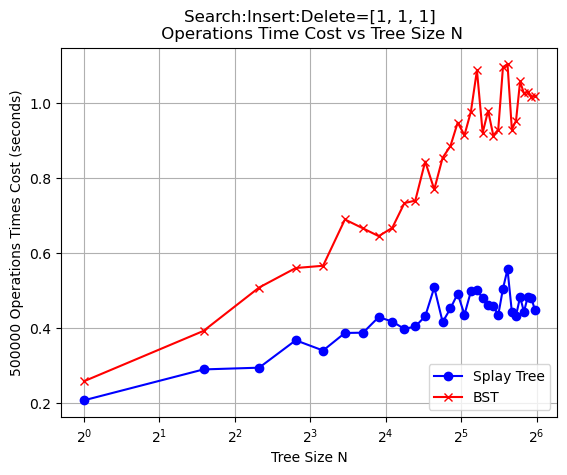

In [3]:

input_sizes = []
splay_times = []
bst_times=[]
seqLen=500000
taskFreq=[1,1,1]
recentFreq=[1,1]
preOp=10
for size in range(1, 2**6, 2):

    input_sizes.append(size)
    splay_time_all=[]
    bst_time_all=[]

    # 生成任务序列，其中taskFreq决定 三种任务的占比
    seq1, op1, exist = getTaskSeq_allRecent(existsLen=size, seqLen=seqLen, taskFreq=taskFreq, recentFreq=recentFreq, preOp=preOp)
    seq0 = exist
    op0 = [1 for i in range(len(seq0))]

    sp = SplayTree()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    splay_times.append(end_time - start_time)


    sp = BST()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    bst_times.append(end_time - start_time)


drawPlot(input_sizes, splay_times,bst_times,seqLen,taskFreq)

## 对上图的结果分析
可以看到相对第一个cell的图，splayTree的效果还是得到了提升，但是这里设置的recentFreq=1：1,不如上一个cell的将尽15：1  
所以看出的提升不太明显，故可继续加大recentFreq,也即加大时间局部性做实验比较，后面将其称为Recent Ratio

# BST 和 Spaly Tree Recent Ratio实验
Recent Ratio = 5：1时的实验  
preOp=10

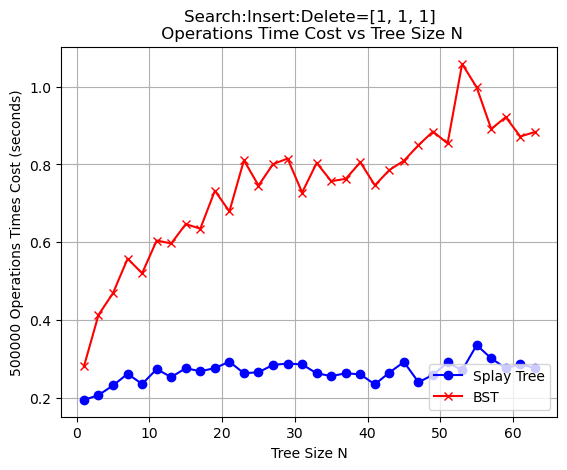

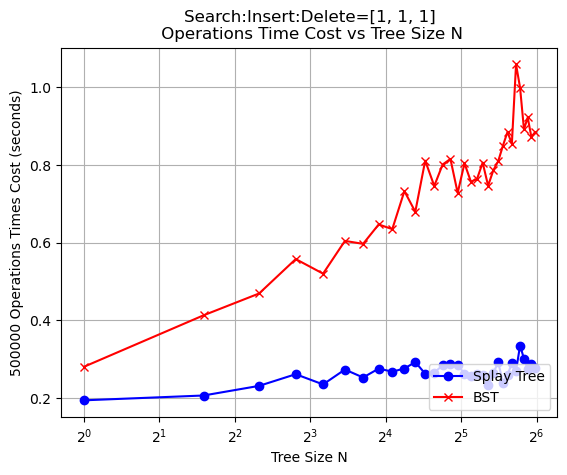

In [4]:

input_sizes = []
splay_times = []
bst_times=[]
seqLen=500000
taskFreq=[1,1,1]
recentFreq=[5,1]
preOp=10
for size in range(1, 2**6, 2):

    input_sizes.append(size)
    splay_time_all=[]
    bst_time_all=[]

    # 生成任务序列，其中taskFreq决定 三种任务的占比
    seq1, op1, exist = getTaskSeq_allRecent(existsLen=size, seqLen=seqLen, taskFreq=taskFreq, recentFreq=recentFreq, preOp=preOp)
    seq0 = exist
    op0 = [1 for i in range(len(seq0))]

    sp = SplayTree()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    splay_times.append(end_time - start_time)


    sp = BST()
    sp.seq_op(seq0, op0)

    start_time = time.time()
    sp.seq_op(seq1, op1)
    end_time = time.time()
    bst_times.append(end_time - start_time)


drawPlot(input_sizes, splay_times,bst_times,seqLen,taskFreq)

## 对上图的结果分析
可以看到，加大recent ratio后，SplatTree在三个操作下均摊复杂度下降了很多(可以和第一个cell比较)  
接下来继续细看不同 recent ratio下，SplayTree的效果改变

## Spaly Tree 不同recent 操作数 Ratio 实验
通过5个不同的recent ratio来做试验  
其中preOp固定为5

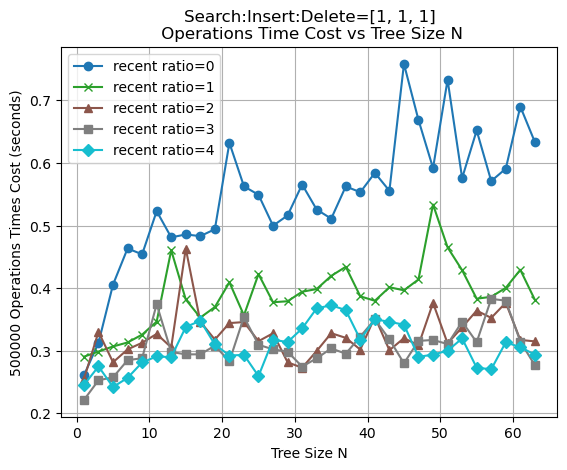

In [11]:

seqLen=500000
taskFreq=[1,1,1]
all=[]
input_sizes = []
ratio_num=5
for recent in range(ratio_num):
    input_sizes = []
    splay_times = []
    bst_times=[]
    recentFreq=[recent,1]
    preOp=5
    for size in range(1, 2**6, 2):

        input_sizes.append(size)
        splay_time_all=[]
        bst_time_all=[]

        # 生成任务序列，其中taskFreq决定 三种任务的占比
        seq1, op1, exist = getTaskSeq_allRecent(existsLen=size, seqLen=seqLen, taskFreq=taskFreq, recentFreq=recentFreq, preOp=preOp)
        seq0 = exist
        op0 = [1 for i in range(len(seq0))]

        # sp = SplayTree()
        # sp.seq_op(seq0, op0)

        # start_time = time.time()
        # sp.seq_op(seq1, op1)
        # end_time = time.time()
        # splay_times.append(end_time - start_time)


        # sp = BST()
        sp = SplayTree()
        sp.seq_op(seq0, op0)

        start_time = time.time()
        sp.seq_op(seq1, op1)
        end_time = time.time()
        bst_times.append(end_time - start_time)

    all.append(bst_times)

# print(all[0])
drawPlot_general(input_sizes, all,[f'recent ratio={i}' for i in range(ratio_num)], seqLen, taskFreq)

## 对上图的结果分析：  
recent =0 时(即数据没有时间局部性，每次选取的操作数都是随机选的，而不是随机在前preOp的数中选的) 此时花费时间最长  
随着 recent ratio增加，时间局部性的增加，SplayTree 在三个操作上的时间也越来越少  
实验中的recent ratio=4(时间局部性最大)时，所花费时间最少   

## BST 不同recent 操作数 Ratio 实验


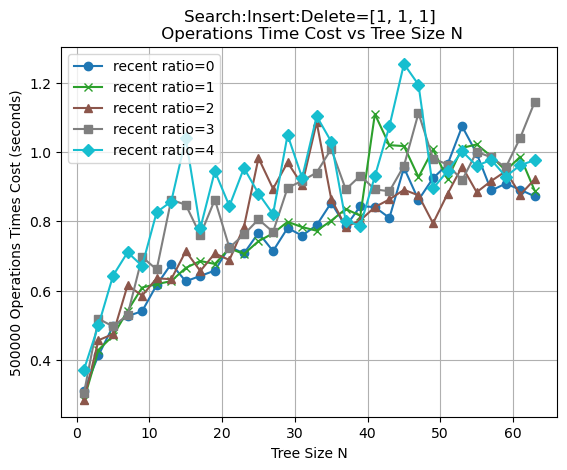

In [13]:

seqLen=500000
taskFreq=[1,1,1]
all=[]
input_sizes = []
ratio_num=5
for recent in range(ratio_num):
    input_sizes = []
    splay_times = []
    bst_times=[]
    recentFreq=[recent,1]
    preOp=5
    for size in range(1, 2**6, 2):

        input_sizes.append(size)
        splay_time_all=[]
        bst_time_all=[]

        # 生成任务序列，其中taskFreq决定 三种任务的占比
        seq1, op1, exist = getTaskSeq_allRecent(existsLen=size, seqLen=seqLen, taskFreq=taskFreq, recentFreq=recentFreq, preOp=preOp)
        seq0 = exist
        op0 = [1 for i in range(len(seq0))]

        # sp = SplayTree()
        # sp.seq_op(seq0, op0)

        # start_time = time.time()
        # sp.seq_op(seq1, op1)
        # end_time = time.time()
        # splay_times.append(end_time - start_time)


        sp = BST()
        sp.seq_op(seq0, op0)

        start_time = time.time()
        sp.seq_op(seq1, op1)
        end_time = time.time()
        bst_times.append(end_time - start_time)

    all.append(bst_times)

# print(all[0])
drawPlot_general(input_sizes, all,[f'recent ratio={i}' for i in range(ratio_num)], seqLen, taskFreq)

## 对上图的结果分析
可以看到，recent ratio越大(也即时间局部性越大)，反而花费的时间越大  

在普通BST中  
ratio越大反而时间越大  
可能因为ratio大时，可能存在一些比较深的num，总是search/insert/delete他这些num  
ratio小时，随机性最大，从而不会总是search/insert/delete最深的那些 num  

## 上述两个cell的分析总结
在preOp不变，recent ratio增加的情况下，也即时间局部性增加的情况下：
- **SplayTree** 效果随着时间局部性的增加而增加，时间越来越少
- **普通BST** 效果着时间局部性的增加而下降，时间越来越多

## 时间局部性(preOp的角度)
接下来固定recentFreq也即recent ratio为2：1  
来看一看preOp对于时间局部性影响下，普通BST和SplayTree的试验  
采取不同的5个不同的preOp来探究，即0，2，4，6，8  

注意这里 preOp=0对应的是 preOp=len(OpNum),局部范围无穷，也即最大的局部范围   
(每次以一定的概率在 最近的preOp个操作数中随机选一个作为操作数)
## SpalyTree 在不同preOp下的实验

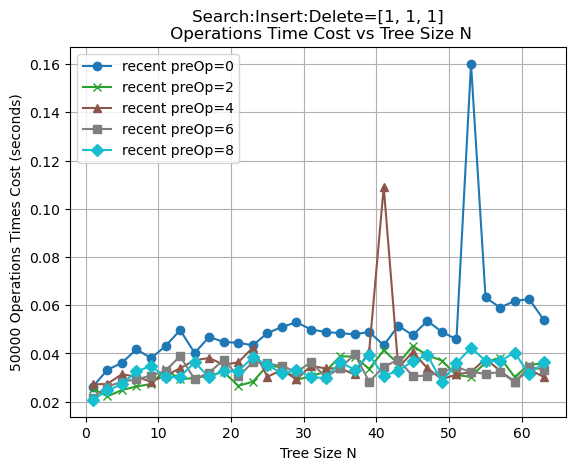

In [3]:

seqLen=50000
taskFreq=[1,1,1]
all=[]
input_sizes = []
ratio_num=5
for recent in range(ratio_num):
    input_sizes = []
    splay_times = []
    bst_times=[]
    recentFreq=[2,1]
    preOp=recent*2
    for size in range(1, 2**6, 2):

        input_sizes.append(size)
        splay_time_all=[]
        bst_time_all=[]

        # 生成任务序列，其中taskFreq决定 三种任务的占比
        seq1, op1, exist = getTaskSeq_allRecent(existsLen=size, seqLen=seqLen, taskFreq=taskFreq, recentFreq=recentFreq, preOp=preOp)
        seq0 = exist
        op0 = [1 for i in range(len(seq0))]

        # sp = SplayTree()
        # sp.seq_op(seq0, op0)

        # start_time = time.time()
        # sp.seq_op(seq1, op1)
        # end_time = time.time()
        # splay_times.append(end_time - start_time)


        # sp = BST()
        sp = SplayTree()
        sp.seq_op(seq0, op0)

        start_time = time.time()
        sp.seq_op(seq1, op1)
        end_time = time.time()
        bst_times.append(end_time - start_time)

    all.append(bst_times)

# print(all[0])
drawPlot_general(input_sizes, all,[f'recent preOp={i*2}' for i in range(ratio_num)], seqLen, taskFreq)

## 对上图的结果分析
preOp从2，4，6，8，0，使得局部性范围的增加，时间局部性逐渐减小  
基本趋势为：随着preOp的增大(2-->len(opNum))，花费的时间越来越多(但是趋势不大)  

注意这里 preOp=0对应的是 preOp=len(OpNum),局部范围无穷，也即最大的局部范围，最小的时间局部性  

## 普通BST 在不同preOp下的实验

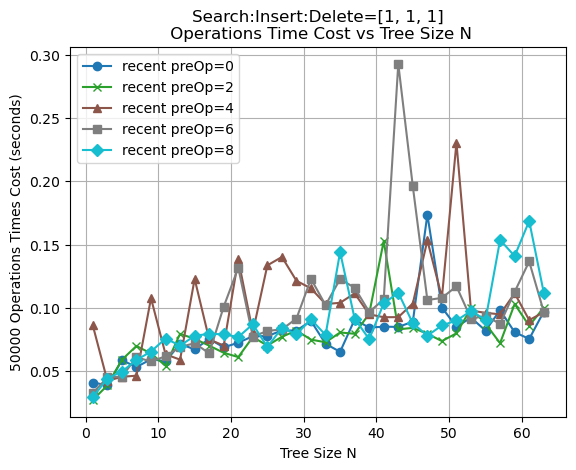

In [4]:

seqLen=50000
taskFreq=[1,1,1]
all=[]
input_sizes = []
ratio_num=5
for recent in range(ratio_num):
    input_sizes = []
    splay_times = []
    bst_times=[]
    recentFreq=[2,1]
    preOp=recent*2
    for size in range(1, 2**6, 2):

        input_sizes.append(size)
        splay_time_all=[]
        bst_time_all=[]

        # 生成任务序列，其中taskFreq决定 三种任务的占比
        seq1, op1, exist = getTaskSeq_allRecent(existsLen=size, seqLen=seqLen, taskFreq=taskFreq, recentFreq=recentFreq, preOp=preOp)
        seq0 = exist
        op0 = [1 for i in range(len(seq0))]

        # sp = SplayTree()
        # sp.seq_op(seq0, op0)

        # start_time = time.time()
        # sp.seq_op(seq1, op1)
        # end_time = time.time()
        # splay_times.append(end_time - start_time)


        sp = BST()
        # sp = SplayTree()
        sp.seq_op(seq0, op0)

        start_time = time.time()
        sp.seq_op(seq1, op1)
        end_time = time.time()
        bst_times.append(end_time - start_time)

    all.append(bst_times)

# print(all[0])
drawPlot_general(input_sizes, all,[f'recent preOp={i*2}' for i in range(ratio_num)], seqLen, taskFreq)

## 对上图结果的分析
好像普通BST对于preOp改变没有那么敏感

## 空间局部性数据
接下来尝试增加一个空间局部性  
也即以一定概率，从上一个操作数x的范围 x-sigma,x+sigma中，随机选取一个数作为操作数
## SplayTree在具有空间局部性数据上的表现

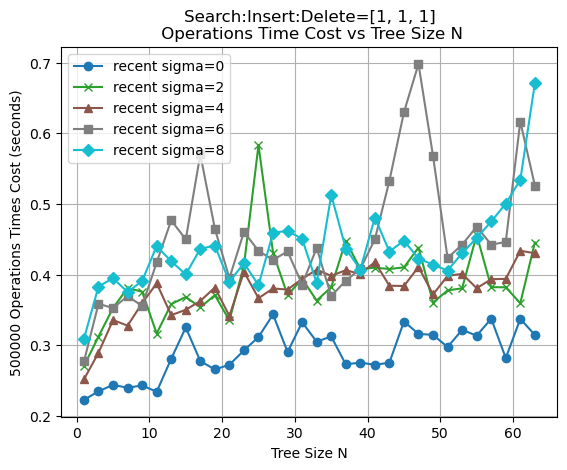

In [8]:

seqLen=500000
taskFreq=[1,1,1]
all=[]
input_sizes = []
ratio_num=5
for recent in range(ratio_num):
    input_sizes = []
    splay_times = []
    bst_times=[]
    recentFreq=[2,1]
    # 这里写成preOp=1为了让sigma=0时，直接选前一个
    preOp=1
    for size in range(1, 2**6, 2):

        input_sizes.append(size)
        splay_time_all=[]
        bst_time_all=[]

        # 生成任务序列，其中taskFreq决定 三种任务的占比
        seq1, op1, exist = getTaskSeq_allRecent(existsLen=size, seqLen=seqLen, taskFreq=taskFreq, recentFreq=recentFreq, preOp=preOp, sigma=recent*2)
        seq0 = exist
        op0 = [1 for i in range(len(seq0))]

        # sp = SplayTree()
        # sp.seq_op(seq0, op0)

        # start_time = time.time()
        # sp.seq_op(seq1, op1)
        # end_time = time.time()
        # splay_times.append(end_time - start_time)


        # sp = BST()
        sp = SplayTree()
        sp.seq_op(seq0, op0)

        start_time = time.time()
        sp.seq_op(seq1, op1)
        end_time = time.time()
        bst_times.append(end_time - start_time)

    all.append(bst_times)

# print(all[0])
drawPlot_general(input_sizes, all,[f'recent sigma={i*2}' for i in range(ratio_num)], seqLen, taskFreq)

## 对上图结果的分析

基本趋势为：随着sigma的增大，也即空间局部性的降低，花费时间也增加
其中sigma最小=0时，空间局部性最大，花费的时间最少
sigma=8,空间局部性最小时，花费的时间最多

## 普通BST在应对具有空间局部性数据上的表现

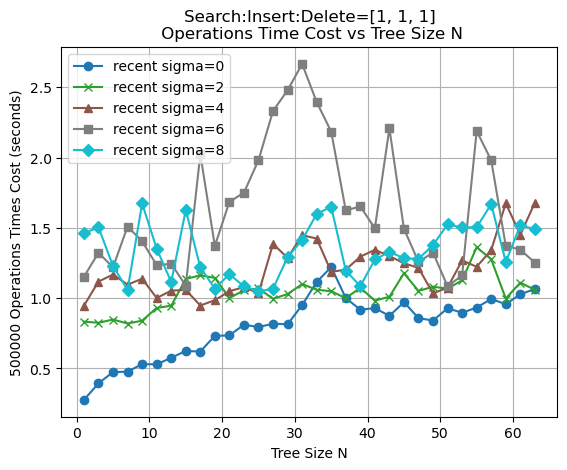

In [10]:

seqLen=500000
taskFreq=[1,1,1]
all=[]
input_sizes = []
ratio_num=5
for recent in range(ratio_num):
    input_sizes = []
    splay_times = []
    bst_times=[]
    recentFreq=[2,1]
    preOp=1
    for size in range(1, 2**6, 2):

        input_sizes.append(size)
        splay_time_all=[]
        bst_time_all=[]

        # 生成任务序列，其中taskFreq决定 三种任务的占比
        seq1, op1, exist = getTaskSeq_allRecent(existsLen=size, seqLen=seqLen, taskFreq=taskFreq, recentFreq=recentFreq, preOp=preOp, sigma=recent*2)
        seq0 = exist
        op0 = [1 for i in range(len(seq0))]

        # sp = SplayTree()
        # sp.seq_op(seq0, op0)

        # start_time = time.time()
        # sp.seq_op(seq1, op1)
        # end_time = time.time()
        # splay_times.append(end_time - start_time)


        sp = BST()
        # sp = SplayTree()
        sp.seq_op(seq0, op0)

        start_time = time.time()
        sp.seq_op(seq1, op1)
        end_time = time.time()
        bst_times.append(end_time - start_time)

    all.append(bst_times)

# print(all[0])
drawPlot_general(input_sizes, all,[f'recent sigma={i*2}' for i in range(ratio_num)], seqLen, taskFreq)

## 对上图的结果分析
普通BST怎么也对具有空间局部性的数据敏感？